# Анимация

Существует два подхода к анимации. Первый, который является более простым и затратным, сводится к том, что:

    стирается предыдуший кадр,
    рисуется очередной кадр,
    делается задержка, чтобы обеспечить требуемое число кадров в секунду (fps),
    повторяем процесс, начиная с пункта 1.

Второй подход заключается в том, чтобы сначала нарисовать "фон" анимации, а на каждом кадре перерисовывать только то, что измениолось в текущем кадре. Именно этот подход используется в примерах анимации matplotlib. Естественно, второй подход менее ресурсоемкий, но требует хороших знаний об объектах matplotlib.

Именно поэтому мы начнем с первого подхода. Очевидно, что время расчета и отрисовки кадра анимации должна быть менее 1./fps, где fps - число кадров в секунду. fps не должно быть меньше 5, так что не всякий процесс удастся анимировать.


In [ ]:
Класс matplotlib.animation.FuncAnimation

Отображение анимации осуществляется с помощью объекта matplotlib animation.FuncAnimation, при создании которого конструктору передаются следующие параметры:

    fig – объект листа, на котором осуществляется анимация;
    func – функция, формирующая очередной кадр анимации, данной функции передается единственный обязательный параметр – номер кадра, остальные параметры необязательные;
    frames = None – число отображаемых кадров;
    init_func = None – функция, отображающая «фон» анимации, т.е. все, что нужно нарисовать перед выводом нулевого кадра; вызывается функция только один раз перед отображением нулевого кадра. Если функцию не задать, то вместо нее вызывается функция, переданная в параметре func с номером кадра, равным нулю, так что нулевой кадр в этом случае отображается дважды;
    fargs = None – последовательность необязательных параметров, передаваемых функции func; repeat =True – параметр отвечающий за зацикливание анимации, если его значением является True, то после проигрывания анимация она будет начинаться сначала;
    interval – интервал времени в миллисекундах между отображением смежных кадров анимации;
    *blit – именованный параметр, отвечающий за стирание содержимого предыдущих кадров; если задать blit = True, то функции func и init_func должны возвращать итерируемые объекты, содержащие то, что что нужно стереть; использование этого режима позволяет существенно ускорить расчет кадров анимации. Если blit=False, то проблемами стирания мусора, оставшегося при отображении предыдущих кадров нужно обеспокоиться при написании функции func.

Ниже приводится макет для создания анимации.

In [ ]:
01    # обязательный  импорт для отображения анимации
02    import matplotlib.pyplot as plt
03    import matplotlib.animation as animation
04    
05    # подготовка данных для анимации
06    # создание объектов листа и хотя бы одного рисунка
07    fig, ax = plt.subplots()
08    
09    def init():
10        # подготовка анимации
11        pass
12    def animate(i):
13        # отображение i-ого кадра
14        pass
15    
16    anim = animation.FuncAnimation(fig, animate, frame=100,
17           init_func=init, interval=10, repeat=False)

Любой скрипт для создания анимации начинается с обязательного импорта matplotlib и animation (строки 1–3). Далее осуществляется подготовка данных для анимации, создание объекта листа, так как его требуется передавать конструктору объекта FuncAnimation и, если необходимо, то объектов рисунков (строки 5–7), после чего следуют определения функций, формирующих «задник» анимации (строки 9–11) и отображение кадра анимации (12–14). В строках 16–18 создается объект анимации.

Нам придется воспользоваться командой %matplotlib notebook, которая в дополнение возможности отображения анимации позволяет менять масштаб отображаемой картинки, перемещать ее с помощью элементов управления.

Давайте анимируем графики функции sinc(x)=sinxx
, причем текущее значение функции будем отмечать маркером, а также будем отображать след от предыдущих положений маркера.

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


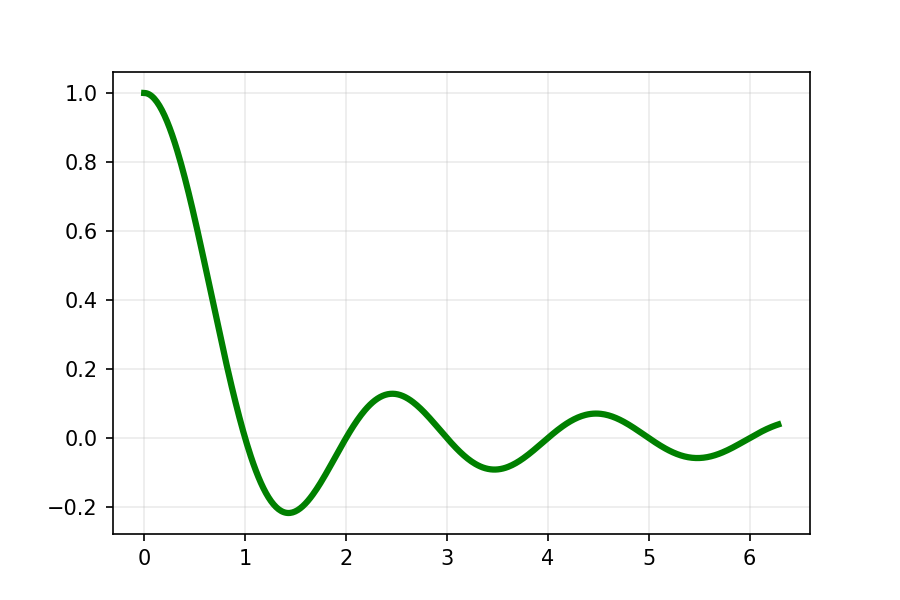

In [3]:
n = 501 # число точек графика
x = np.linspace(0., 2.*np.pi, n)
y = np.sinc(x)

# статический график
fig = plt.figure(figsize=(6,4))
plt.plot(x, y, lw=3, color='green')
plt.grid(ls='solid', lw=0.2)

In [2]:
m = 1 # коэффициент ускорения
fig = plt.figure(figsize=(6,4))

def animate(i, x, y, m = 5):
    '''
    кадр анимации,
    i - номер кадра
    x, y - данные
    m - число пропускаемых кадров
    '''
    
    plt.clf() # стираю предыдуший кадр
    plt.plot(x[:i*m], y[:i*m], color='green', lw=3)
    plt.plot(x[i*m], y[i*m],'bo', ms=10 )
    
    plt.xlim(0, 7)
    plt.ylim(-0.4, 1.2)
    plt.grid(ls='solid', lw=0.2)
    
    
anim = animation.FuncAnimation(fig, animate,  fargs=(x, y, m), frames=int(n/m), interval=1, repeat=False)


NameError: name 'plt' is not defined

# То же самое, но с помощью второго подхода

In [3]:
def update_plot_data(i, x, y, m, l, mk):
    # l -линия, mk - маркер
    l.set_data(x[:i*m], y[:i*m])
    mk.set_data(x[i*m], y[i*m])
    
# инициализация
m = 1 # коэффициент ускорения
fig = plt.figure(figsize=(6,4))

plt.xlim(0, 7)
plt.ylim(-0.4, 1.2)
plt.grid(ls='solid', lw=0.2)

l, = plt.plot([], [], 'k-', lw=3)
mk, = plt.plot([], [], 'ro', ms =10)

anim = animation.FuncAnimation(fig, update_plot_data, int(n/m), fargs=(x, y, m, l, mk),
                                   interval=1, blit=True, repeat = False)

NameError: name 'plt' is not defined

# Примеры

In [4]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)
 
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
 
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


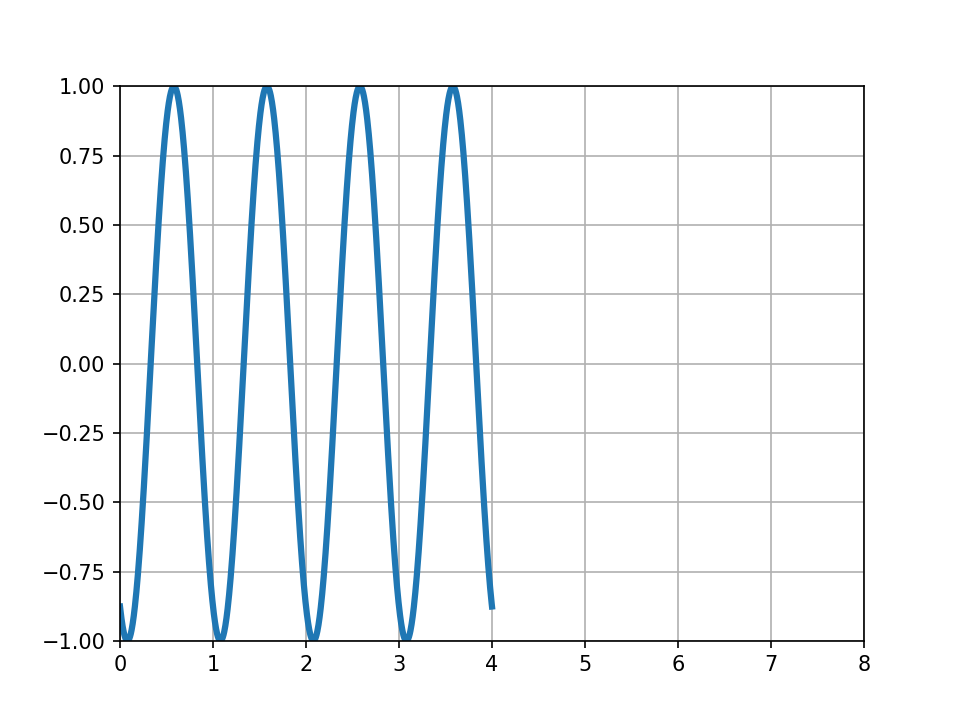

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(0, 8), ylim=(-1, 1) )
line, = ax.plot([ ], [ ], lw=3) # line = объект кривой
ax.grid(True)

#C=1e-9
#L=1e-3


def redraw(i):
    x = np.linspace(0, 8, 200)
    y = np.cos(x * 10)*(np.exp(-i*x/40))
    line.set_data(x, y) # результат обязательно присваивать переменной
anim =animation.FuncAnimation(fig,redraw,frames=200,interval=50)

<IPython.core.display.Javascript object>


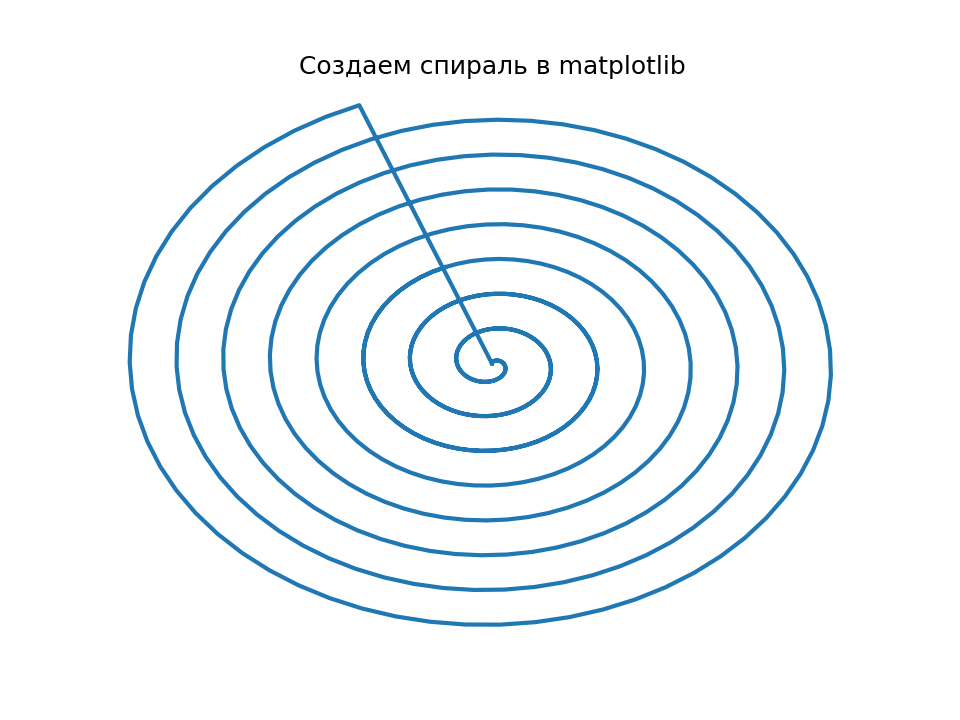

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
 
#plt.style.use('dark_background')
 
fig = plt.figure()
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
line, = ax.plot([], [], lw=2)
 
 
# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,
 
 
xdata, ydata = [], []
 
 
# функция анимации
def animate(i):
    t = 0.1 * i
 
    # x, y данные на графике
    x = t * np.sin(t)
    y = t * np.cos(t)
 
    # добавление новых точек в список точек осей x, y
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,
 
 
# Заголовок анимации
plt.title('Создаем спираль в matplotlib')
# Скрываем лишние данные
plt.axis('off')
 
# Вызов анимации.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)

<IPython.core.display.Javascript object>


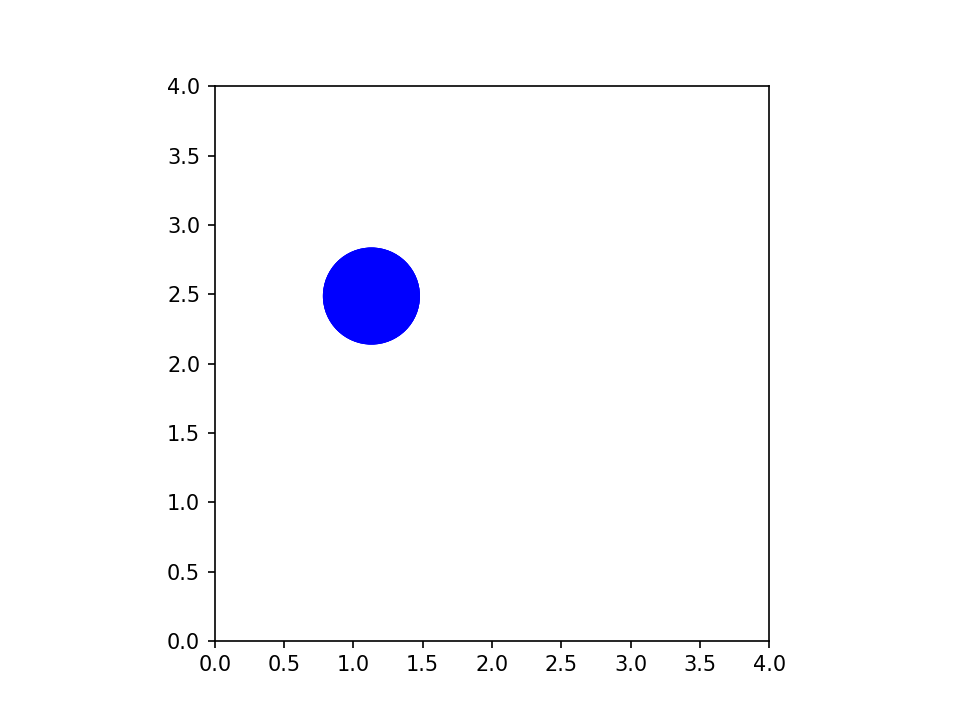

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def initpict():
    pc.center=(x0,y0)
    ax.add_patch(pc)
    return pc, # return [ ] оставляет стартовый шар нарисованным

def redraw(i):
    global x,y,dx,dy
    if x+r>rbod:
        x=rbod-r;
        dx=-dx
    elif x-r<lbod:
        x=r;
        dx=-dx
    else:
        x=x+dx
    if y+r>ubod or y+dy+r>ubod:
        y=ubod-r;
        dy=-dy;
    elif y-r<dbod or y-r+dy<dbod:
        y=r;
        dy=-dy
    else:
        y=y+dy
        pc.center=(x,y)
    return pc,

fig = plt.figure(facecolor='white')
fig.set_dpi(100)
rbod=4;lbod=0; ubod=4; dbod=0 # границы области
ax = plt.axes(xlim=(lbod, rbod), ylim=(dbod, ubod) )
ax.set_aspect('equal') # начальное положение и радиус шара
x0=3; y0=1; r=0.35; dx=0.03; dy=0.0125 # вектор начальной скорости (направления)
x=x0; y=y0
pc = plt.Circle((x, y), r, fc='b')
anim =animation.FuncAnimation(fig, redraw, init_func=initpict, frames=400, interval=20,blit=True)